Ocho empleados de una pequeña empresa eligieron las 3 películas que más les gustaría ver para la próxima noche de cine de la empresa. Estas opciones se almacenan en el archivo `Employee_Movie_Choices.txt`.

Un segundo archivo, `Employee_Relationships.txt`, tiene datos sobre las relaciones entre diferentes compañeros de trabajo.

La puntuación de la relación tiene un valor de -100 (enemigos) a +100 (mejores amigos). Un valor de cero significa que los dos empleados no han interactuado o son indiferentes.

Ambos archivos están delimitados por tabuladores.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [ ]:
# Conjunto de Empleados
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# Conjunto de peliculas
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

In [ ]:
def plot_graph(G, weight_name=None):
  '''
  G: a networkx G
  weight_name: name of the attribute for plotting edge weights (if G is weighted)
  '''
    
  plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  weights = None
    
  if weight_name:
    weights = [int(G[u][v][weight_name]) for u,v in edges]
    labels = nx.get_edge_attributes(G,weight_name)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw_networkx(G, pos, edges=edges, width=weights);
  else:
    nx.draw_networkx(G, pos, edges=edges);

##Pregunta 1

Usando networkx, carguen el grafo almacenado en el archivo `Employee_Movie_Choices.txt`. Después, crear el grafo bipartito. En total, deben de crearse 24 nodos y 19 enlaces.

In [ ]:
G_df = pd.read_csv('Employee_Movie_Choices.txt', sep='\t', skiprows=1, names=['empleados', 'peliculas'])
G_e = nx.from_pandas_edgelist(G_df, 'empleados', 'peliculas')

In [ ]:
G_e.number_of_nodes()

19

In [ ]:
G_e.number_of_edges()

24

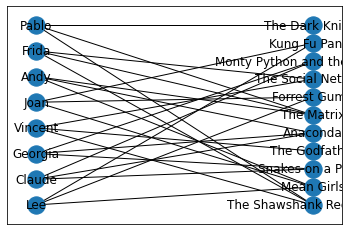

In [ ]:
pos = nx.bipartite_layout(G_e, employees)
nx.draw_networkx(G_e, pos)

##Pregunta 2

Usando el grafo creado en el punto anterior, añadir atributos llamados `'type'` donde las películas tengan el valor `'pelicula'` y los empleados tengan al valor `'empleado'`. 

In [ ]:
for e in employees:
  G_e.add_node(e, type = 'empleado')

for i in movies:
  G_e.add_node(i, type = 'pelicula')

In [ ]:
G_e.nodes(data=True)

NodeDataView({'Andy': {'type': 'empleado'}, 'Anaconda': {'type': 'pelicula'}, 'Mean Girls': {'type': 'pelicula'}, 'The Matrix': {'type': 'pelicula'}, 'Claude': {'type': 'empleado'}, 'Monty Python and the Holy Grail': {'type': 'pelicula'}, 'Snakes on a Plane': {'type': 'pelicula'}, 'Frida': {'type': 'empleado'}, 'The Shawshank Redemption': {'type': 'pelicula'}, 'The Social Network': {'type': 'pelicula'}, 'Georgia': {'type': 'empleado'}, 'Joan': {'type': 'empleado'}, 'Forrest Gump': {'type': 'pelicula'}, 'Kung Fu Panda': {'type': 'pelicula'}, 'Lee': {'type': 'empleado'}, 'Pablo': {'type': 'empleado'}, 'The Dark Knight': {'type': 'pelicula'}, 'Vincent': {'type': 'empleado'}, 'The Godfather': {'type': 'pelicula'}})

##Pregunta 3
Encontrar la proyección ponderada del grafo del punto anterior. ¿Qué nos indica esta proyección?

In [ ]:
P_w = bipartite.weighted_projected_graph(G_e, employees)

{('Andy', 'Frida'): Text(0.22044947090620332, 0.08435453557567903, '1'),
 ('Andy', 'Pablo'): Text(0.2059858960143791, -0.0668020367436582, '1'),
 ('Claude', 'Andy'): Text(-0.3584496821229372, -0.2673789116960395, '1'),
 ('Claude', 'Georgia'): Text(-0.4587834733617091, -0.5810220726303779, '3'),
 ('Frida', 'Pablo'): Text(0.5591076476606787, 0.041395636257576154, '2'),
 ('Georgia', 'Andy'): Text(-0.2330060719788682, -0.33748629835989374, '1'),
 ('Joan', 'Andy'): Text(-0.2763644893017853, 0.26920315779638276, '1'),
 ('Lee', 'Andy'): Text(-0.3902958253672325, 0.18163669449524833, '1'),
 ('Lee', 'Joan'): Text(-0.5339880339289215, 0.4746829897171864, '3'),
 ('Vincent', 'Frida'): Text(0.7867856112762515, 0.17314111965684967, '2'),
 ('Vincent', 'Pablo'): Text(0.7723220363844272, 0.02198454733751244, '1')}

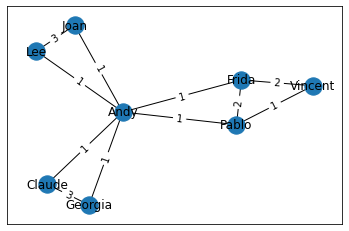

In [ ]:
pos = nx.spring_layout(P_w)
nx.draw_networkx(P_w, pos)
labels = nx.get_edge_attributes(P_w,'weight')
nx.draw_networkx_edge_labels(P_w,pos,edge_labels=labels)

##Pregunta 4

Supongan que quieren determinar si las personas que tienen un valor alto de afinidad también les gusta las mismas películas.

Para esto, vamos a utilizar la correlación de Pearson mediante DataFrame.corr() entre el valor de afinidad y el número de películas que tienen en común. Si dos empleados no tienen películas en común, se considera que el valor es 0, no NaN.

In [ ]:
ws = nx.get_edge_attributes(P_w,'weight')
ws

{('Andy', 'Frida'): 1,
 ('Andy', 'Pablo'): 1,
 ('Claude', 'Andy'): 1,
 ('Claude', 'Georgia'): 3,
 ('Frida', 'Pablo'): 2,
 ('Georgia', 'Andy'): 1,
 ('Joan', 'Andy'): 1,
 ('Lee', 'Andy'): 1,
 ('Lee', 'Joan'): 3,
 ('Vincent', 'Frida'): 2,
 ('Vincent', 'Pablo'): 1}

In [ ]:
r_df = pd.read_csv('Employee_Relationships.txt', sep='\t', names=['e1','e2', 'relacion'])

In [ ]:
for index, row in r_df.iterrows():
  try:
    r_df.loc[index, 'peso'] = ws[(row['e1'], row['e2'])]
  except:
    r_df.loc[index, 'peso'] = 0

for index, row in r_df.iterrows():
  try:
    r_df.loc[index, 'peso'] = ws[(row['e2'], row['e1'])]
  except:
    pass

In [ ]:
r_df

,e1,e2,relacion,peso
0,Andy,Claude,0,1.0
1,Andy,Frida,20,1.0
2,Andy,Georgia,-10,1.0
3,Andy,Joan,30,1.0
4,Andy,Lee,-10,1.0
5,Andy,Pablo,-10,1.0
6,Andy,Vincent,20,0.0
7,Claude,Frida,0,0.0
8,Claude,Georgia,90,3.0
9,Claude,Joan,0,0.0


In [ ]:
r_df.corr()

,relacion,peso
relacion,1.000000,0.788396
peso,0.788396,1.000000
